In [2]:
import numpy as np
import matplotlib.pyplot as plt

Ejercicio 1

In [3]:
def ecuacion(n,a,b,y0,lamb):
    h = (b-a)/n
    t = np.arange(a,b,h)
    y = [0 for i in range(n)]
    y[0] = y0

    for i in range(n-1):
        y[i+1] = y[i] + h*(lamb*y[i])

    return (t,y)

In [4]:
t, y = ecuacion(100, 0, 1, 1, 10)

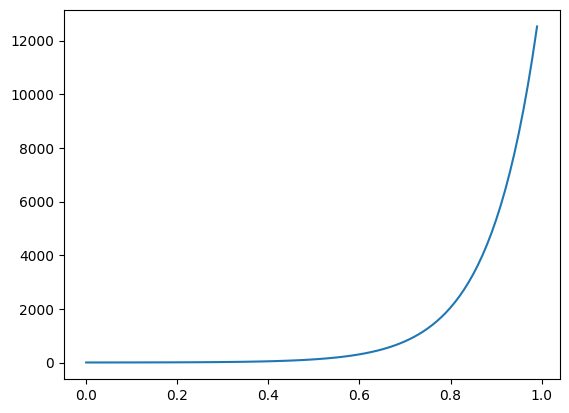

In [5]:
plt.plot(t,y)

Ejercicio 2

In [6]:
def logistica(h,a,b,P0,r,K):
    n = int((b-a)/h)
    t = np.arange(a,b,h)
    P = [0 for i in range(n)]
    P[0] = P0

    for i in range(n-1):
        P[i+1] = P[i] + h*(r*P[i]*(1-(P[i]/K)))

    return (t, P)

In [7]:
K = 100
r = 2
P0 = 10

In [8]:
t, P = logistica(0.01,0,10,P0,r,K)

In [9]:
P1 = [(K/(1+((K-P0)/P0*np.exp(-r*i)))) for i in t]

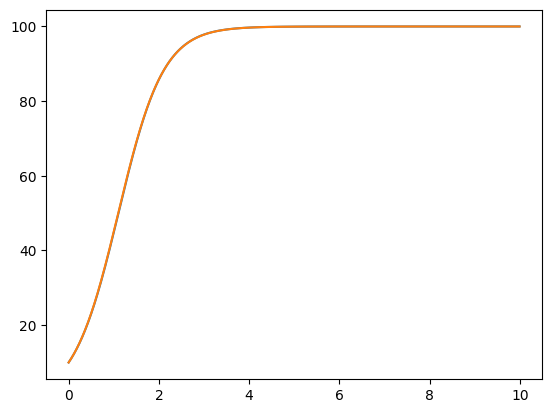

In [10]:
plt.plot(t,P)
plt.plot(t, P1)

In [18]:
def errorh(M, funcion):
    e = [0 for i in range(M)]
    h = [0 for j in range(M)]
    for i in range(M):
        H = 2**(-i)
        h[i] = H
        t,P = funcion(H, 0, 10, P0, r, K)
        P1 = [(K/(1+((K-P0)/P0*np.exp(-r*i)))) for i in t]
        e[i] = abs(P[-1]-P1[-1])
    return (e, h)

In [19]:
e, h = errorh(8, logistica)

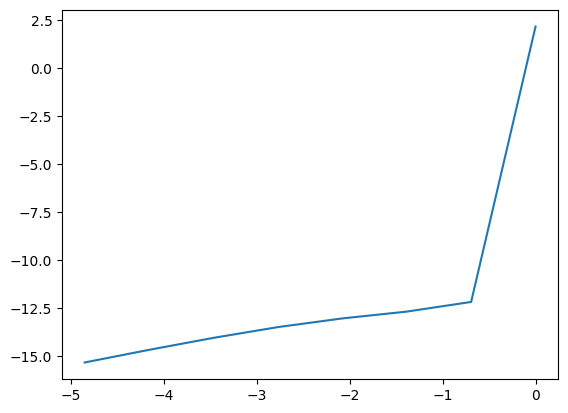

In [20]:
plt.plot(np.log(h),np.log(e))

In [21]:
def f(t, P):
    return r*P*(1-(P/K))

In [22]:
def logistica2(h,a,b,P0,r,K):
    n = int((b-a)/h)
    t = np.arange(a,b,h)
    P = [0 for i in range(n)]
    P[0] = P0

    for i in range(n-1):
        P[i+1] = P[i] + h*f(t[i]+(h/2), P[i]+(h/2)*f(t[i], P[i]))

    return (t, P)

In [23]:
e, h = errorh(8, logistica2)

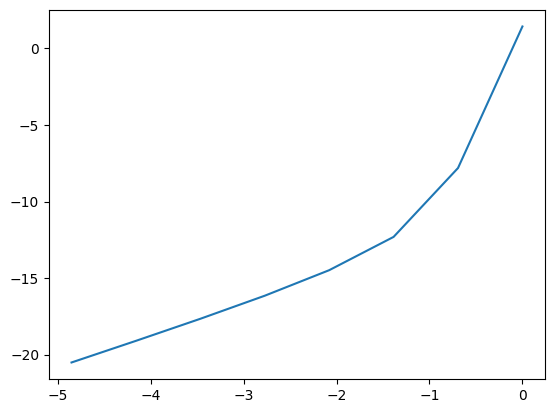

In [24]:
plt.plot(np.log(h),np.log(e))

In [ ]:
def Euler(a,b,n,F,y0):
    h = (b-a)/n
    t = np.arange(a,b,h)
    y = [0 for i in range(n)]
    y[0] = y0

    for i in range(n-1):
        y[i+1] = y[i] + h*(F(t[i], y[i]))
    
    return (t,y)

In [31]:
def Heun(a,b,n,F,y0):
    h = (b-a)/n
    t = np.arange(a,b,h)
    y = [0 for i in range(n)]
    y[0] = y0

    for i in range(n-1):
        K1 = F(t[i], y[i])
        K2 = F(t[i]+(2/3)*h, y[i]+(2/3)*h*K1)
        y[i+1] = y[i] + h*((1/4)*K1+(3/4)*K2)
    
    return (t,y)

In [32]:
def r(t):
    return (0.2 + 0.2*np.cos(2*np.pi*t))

In [56]:
K = 1000
m = 0.1

In [57]:
def g(ti,yi):
    return r(ti)*yi*(1-(yi/K))-m*yi

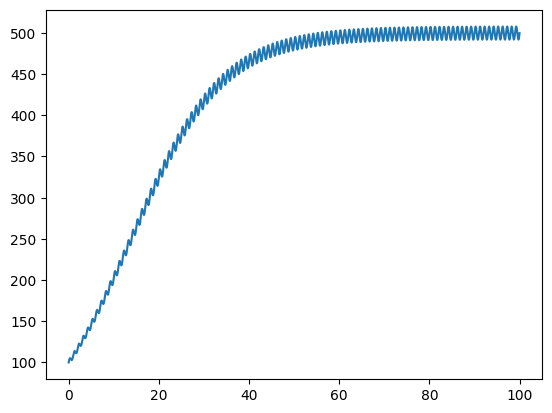

In [58]:
t, y = Heun(0, 100, 18250, g, 100)
plt.plot(t,y)

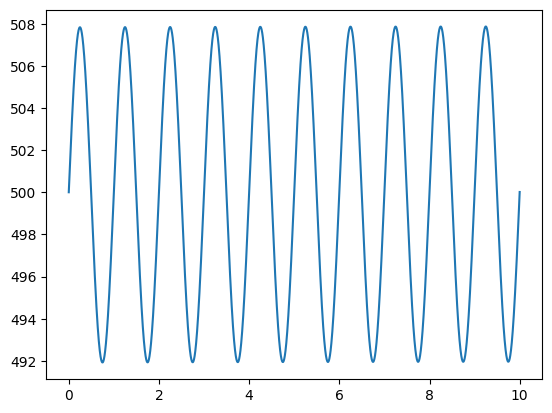

In [60]:
t, y = Heun(0, 10, 18250, g, 500)
plt.plot(t,y)

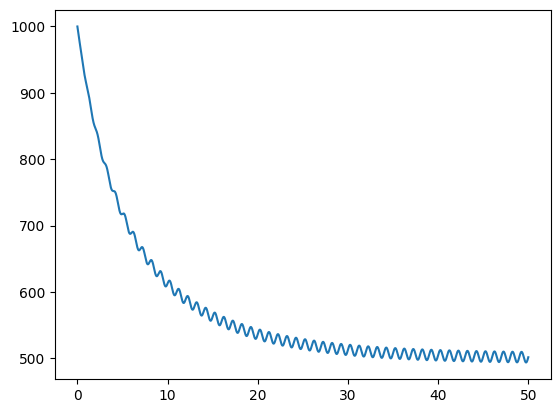

In [62]:
t, y = Heun(0, 50, 18250, g, 1000)
plt.plot(t,y)

Ejercicio 4

In [127]:
def RungeKuttaGen(a,b,n,F,y0,alp,A1,A2):
    h = (b-a)/n
    t = np.arange(a,b,h)
    y = np.zeros((y0.size, n))
    y[:,0] = y0

    for i in range(n-1):
        K1 = F(t[i], y[:,i])
        K2 = F(t[i]+alp*h, y[:,i]+alp*h*K1)
        y[:,i+1] = y[:,i] + h*(A1*K1+A2*K2)
    
    return (t, y)

Ejercicio 5

In [128]:
g = 9.81
cr = 0.028
m = 0.084
y0 = np.array([100, 1])

In [129]:
def T(t,v):
    return np.array([v,g - (cr/m)*v**2])

In [130]:
y = np.zeros((y0.size, 100))
y[:,0].shape

(2,)

In [131]:
t, v = RungeKuttaGen(0, 5, 100, T, y0, 2/3, 1/4, 3/4)

ValueError: could not broadcast input array from shape (2,2,2) into shape (2,)